In [ ]:
import numpy as np
audio_feat_path = '/content/drive/MyDrive/CS670_Project/audio/audio_features.npy'
video_feat_path='/content/drive/MyDrive/CS670_Project/video_feats_pca.npy'
audio_names_path = '/content/drive/MyDrive/CS670_Project/audio/names_final.npy'
video_names_path='/content/drive/MyDrive/CS670_Project/model/video_names.npy'
audio_labels_path = '/content/drive/MyDrive/CS670_Project/audio/labels.npy'
video_labels_path = '/content/drive/MyDrive/CS670_Project/model/video_labels.npy'

X_video = np.load(video_feat_path)
X_audio = np.load(audio_feat_path)
y=[]
video_names= np.load(video_names_path)
audio_names= np.load(audio_names_path)

audio_names.shape, video_names.shape
audio_labels= np.load(audio_labels_path)
video_labels= np.load(video_labels_path)

In [ ]:
video_feats=[]
audio_feats=[]
labels=[]
mapping_dict = {"advertisement":0,
        "drama":1,
        "entertainment": 2,
        "interview": 3,
        "live_broadcast": 4,
        "movie": 5,
        "play": 6,
        "recitation": 7,
        "singing": 8,
        "speech": 9,
        "vlog": 10}


for i,name in enumerate(video_names):
  n2=name.split('.')[0]+'.wav'
  print(i,name)
  if n2 in audio_names:
    index = np.where(audio_names == n2)[0][0]
    if mapping_dict[audio_labels[index]] == video_labels[i]:
      print("Appending..")
      video_feats.append(X_video[i])
      audio_feats.append(X_audio[index])
      labels.append(video_labels[i])

X_video2=np.array(video_feats)
X_audio2=np.array(audio_feats)
y=np.array(labels)


Streaming output truncated to the last 5000 lines.
128136 id30202-interview-04-001.mp4
128137 id30202-interview-04-002.mp4
128138 id30202-interview-04-004.mp4
128139 id30202-interview-04-005.mp4
128140 id30202-interview-04-010.mp4
128141 id30202-interview-04-024.mp4
128142 id30202-interview-04-028.mp4
128143 id30202-interview-04-022.mp4
128144 id30202-interview-04-021.mp4
128145 id30202-interview-04-029.mp4
128146 id30202-interview-04-036.mp4
128147 id30202-interview-04-040.mp4
128148 id30202-interview-04-031.mp4
128149 id30202-interview-04-049.mp4
128150 id30202-interview-04-044.mp4
128151 id30202-interview-04-061.mp4
128152 id30202-interview-04-062.mp4
128153 id30202-interview-04-074.mp4
128154 id30202-interview-04-072.mp4
128155 id30202-interview-04-073.mp4
128156 id30202-interview-04-066.mp4
128157 id30202-interview-04-079.mp4
128158 id30202-interview-04-084.mp4
128159 id30202-interview-04-083.mp4
128160 id30202-interview-04-097.mp4
128161 id30202-interview-04-103.mp4
128162 id3020

In [ ]:
np.save('/content/drive/MyDrive/CS670_Project/final_video_feat2',X_video2)
np.save('/content/drive/MyDrive/CS670_Project/final_audio_feat2',X_audio2)
np.save('/content/drive/MyDrive/CS670_Project/final_labels2',y)

In [ ]:
'''X_audio2=np.load('/content/drive/MyDrive/data/final_audio_feat.npy')
X_video2=np.load('/content/drive/MyDrive/data/final_video_feat.npy')
labels=np.load('/content/drive/MyDrive/data/final_labels.npy')'''

import numpy as np

X_audio2=np.load('/content/drive/MyDrive/CS670_Project/final_audio_feat2.npy')
X_video2=np.load('/content/drive/MyDrive/CS670_Project/final_video_feat2.npy')
labels=np.load('/content/drive/MyDrive/CS670_Project/final_labels2.npy')

In [ ]:
X_video2.shape,X_audio2.shape,labels.shape

((105347, 1000), (105347, 5, 40), (105347,))

In [ ]:
#X_train_audio, X_test_audio, y_train, y_test = train_test_split(X_audio2, labels, test_size=0.2, random_state=42)
#X_train_video, X_test_video, y_train, y_test = train_test_split(X_video2, labels, test_size=0.2, random_state=42)

# Assuming you have a dataset X with shape (num_samples, ...) where num_samples is the total number of samples
num_samples = len(X_audio2)
test_size = 0.2  # Desired proportion of data for the test set

# Generate random indices for the test set
test_indices = np.random.choice(num_samples, size=int(test_size * num_samples), replace=False)

# Select data for the test set using the random indices
X_test_audio = X_audio2[test_indices]
X_test_video = X_video2[test_indices]
Y_test = labels[test_indices]
train_indices = [i for i in np.arange(num_samples) if i not in test_indices]

# Split the data into training and test sets
X_train_audio = X_audio2[train_indices]
X_train_video = X_video2[train_indices]
y_train = labels[train_indices]

In [ ]:
X_train_video.shape, X_test_video.shape

((84278, 1000), (21069, 1000))

# Probabilities Experiments

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split

class LSTMClassifier(nn.Module):
    def _init_(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self)._init_()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)  # Take the last time step output
        return torch.softmax(output,dim=1)

### **Combined Probabilities**

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import load_model

# Assuming you have loaded the pre-trained audio and video models
# Example:
classifier_audio = load_model('/content/drive/MyDrive/models/audiomodel.h5')
classifier_video = torch.load('/content/drive/MyDrive/models/lstm_model_full.pth')
X_test_video_tensor = torch.tensor(X_test_video, dtype=torch.float32)

# Set the model to evaluation mode
classifier_video.eval()

# Make predictions using the pre-trained audio and video models

with torch.no_grad():
    y_pred_video = classifier_video(X_test_video_tensor)
y_pred_audio = classifier_audio.predict(X_test_audio)
n_classes=11
# Calculate accuracies of audio and video models
accuracy_audio = accuracy_score(Y_test, np.argmax(y_pred_audio, axis=1))
accuracy_video = accuracy_score(Y_test, np.argmax(y_pred_video.numpy(), axis=1))


# Calculate probabilities based on model accuracies
prob_audio = accuracy_audio / (accuracy_audio + accuracy_video)
prob_video = accuracy_video / (accuracy_audio + accuracy_video)

# Combine predictions for audio and video separately
y_pred_combined_audio = []
y_pred_combined_video = []

for pred_audio, pred_video in zip(y_pred_audio, y_pred_video):
    combined_probabilities_audio = np.zeros(n_classes)
    combined_probabilities_video = np.zeros(n_classes)

    combined_probabilities_audio[np.argmax(pred_audio)] += prob_audio
    combined_probabilities_video[np.argmax(pred_video)] += prob_video

    y_pred_combined_audio.append(np.argmax(combined_probabilities_audio))
    y_pred_combined_video.append(np.argmax(combined_probabilities_video))

# Combine predictions from audio and video models
y_pred_combined = []

for pred_audio, pred_video in zip(y_pred_combined_audio, y_pred_combined_video):
    combined_probabilities = np.zeros(n_classes)

    combined_probabilities[pred_audio] += prob_audio
    combined_probabilities[pred_video] += prob_video

    y_pred_combined.append(np.argmax(combined_probabilities))

# Evaluate the combined predictions
accuracy_combined = accuracy_score(Y_test, y_pred_combined)
print("Accuracy of combined predictions:", accuracy_combined)


659/659 ━━━━━━━━━━━━━━━━━━━━ 96s 145ms/step
Accuracy of combined predictions: 0.8252408752195168


### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your video features stored in X_video and audio features stored in X_audio
# Also assuming you have your labels stored in y
X_audio3=X_audio2.reshape(-1,5*40)
# Combine video and audio features into a single feature matrix
X_combined = np.concatenate((X_video2, X_audio3), axis=1)

# Split the combined features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, labels, test_size=0.2, random_state=42)

In [ ]:
# Initialize lists to store accuracies
test_accuracies = []
train_accuracies = []

for i in range(10):
    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the classifier on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_test = nb_classifier.predict(X_test)
    y_pred_train = nb_classifier.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Append accuracies to lists
    test_accuracies.append(test_accuracy)
    print(test_accuracy)
    train_accuracies.append(train_accuracy)
    print(train_accuracy)

# Print average accuracies over 10 iterations
print("Average Train Accuracy:", sum(train_accuracies) / len(train_accuracies))
print("Average Test Accuracy:", sum(test_accuracies) / len(test_accuracies))


0.505125771238728
0.5060099434009279
0.505125771238728
0.5060099434009279
0.505125771238728
0.5060099434009279
0.505125771238728
0.5060099434009279


KeyboardInterrupt: 

## **Accuracy for Combined Probabilities**

In [ ]:
print("Accuracy of audio model:", accuracy_audio)
print("Accuracy of video model:", accuracy_video)

Accuracy of audio model: 0.8252408752195168
Accuracy of video model: 0.7841852959324126


# Gradient Boosting

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import load_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split

class LSTMClassifier(nn.Module):
    def _init_(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self)._init_()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)  # Take the last time step output
        return torch.softmax(output,dim=1)
classifier_audio = load_model('/content/drive/MyDrive/CS670_Project/audio/audiomodel.h5')
classifier_video = torch.load('/content/drive/MyDrive/CS670_Project/lstm_model_fullpca.pth')


## Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have probabilities from audio and video classifiers: audio_probs and video_probs

classifier_audio = load_model('/content/drive/MyDrive/CS670_Project/audio/audiomodel.h5')
classifier_video = torch.load('/content/drive/MyDrive/CS670_Project/lstm_model_fullpca.pth')

#X_train_audio3=X_train_audio.reshape(-1,5*40)

# Assuming X_test_audio, X_test_video, and Y_test are defined and correctly preprocessed
X_test_video_tensor = torch.tensor(X_test_video, dtype=torch.float32)

# Set the model to evaluation mode
classifier_video.eval()

# Make predictions using the pre-trained audio and video models

audio_probs = classifier_audio.predict(X_train_audio)
X_tr_video_tensor = torch.tensor(X_train_video, dtype=torch.float32)
video_probs = classifier_video(X_tr_video_tensor)

# Combine probabilities from both classifiers
combined_probs = np.concatenate((audio_probs, video_probs.detach().numpy()), axis=1)

# Define labels (replace with your actual labels)
labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10])

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(combined_probs, y_train)
with torch.no_grad():
    y_pred_video = classifier_video(X_test_video_tensor)
y_pred_audio = classifier_audio.predict(X_test_audio)
X_test_combined = np.concatenate((y_pred_audio, y_pred_video), axis=1)

# Make predictions using the trained classifier
# Replace X_test_combined with your test data
y_pred = gb_classifier.predict(X_test_combined)

# Evaluate the predictions
# Replace y_test with your test labels
accuracy = accuracy_score(Y_test, y_pred)
accuracy_audio = accuracy_score(Y_test, np.argmax(y_pred_audio, axis=1))
accuracy_video = accuracy_score(Y_test, np.argmax(y_pred_video.numpy(), axis=1))

print("Audio Accuracy:", accuracy_audio)
print("Video Accuracy:", accuracy_video)
print("Accuracy:", accuracy)


659/659 ━━━━━━━━━━━━━━━━━━━━ 164s 250ms/step
Audio Accuracy: 0.8220608476909204
Video Accuracy: 0.9204518486876454
Accuracy: 0.9460344582087427


## Testing

In [ ]:
import joblib
model_path = '/content/drive/MyDrive/CS670_Project/gb_classifier_model2.pkl'  # Replace 'your_model_file.pkl' with the actual filename

# Load the model
gb_classifier = joblib.load(model_path)

In [ ]:
X_test_video_tensor = torch.tensor(X_test_video, dtype=torch.float32)

with torch.no_grad():
    y_pred_video = classifier_video(X_test_video_tensor)
y_pred_audio = classifier_audio.predict(X_test_audio)
X_test_combined = np.concatenate((y_pred_audio, y_pred_video), axis=1)

# Make predictions using the trained classifier
# Replace X_test_combined with your test data
y_pred = gb_classifier.predict(X_test_combined)

# Evaluate the predictions
# Replace y_test with your test labels
accuracy = accuracy_score(Y_test, y_pred)
accuracy_audio = accuracy_score(Y_test, np.argmax(y_pred_audio, axis=1))
accuracy_video = accuracy_score(Y_test, np.argmax(y_pred_video.numpy(), axis=1))

print("Audio Accuracy:", accuracy_audio)
print("Video Accuracy:", accuracy_video)
print("Accuracy:", accuracy)

659/659 ━━━━━━━━━━━━━━━━━━━━ 164s 249ms/step
Audio Accuracy: 0.8208268071574351
Video Accuracy: 0.9159428544306801
Accuracy: 0.9502112107836157


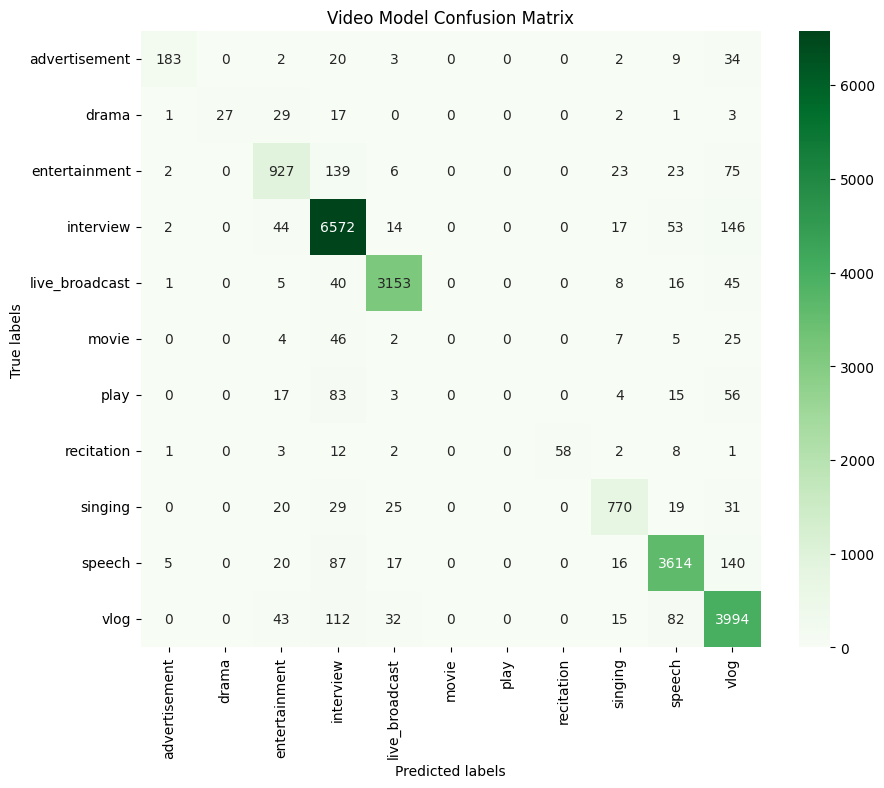

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels
# Make sure both y_true and y_pred are 1-dimensional arrays/lists of the same length

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, np.argmax(y_pred_video.numpy(), axis=1))

# Display the confusion matrix
mapping_dict = {
    0: "advertisement",
    1: "drama",
    2: "entertainment",
    3: "interview",
    4: "live_broadcast",
    5: "movie",
    6: "play",
    7: "recitation",
    8: "singing",
    9: "speech",
    10: "vlog"
    }
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=mapping_dict.values(), yticklabels=mapping_dict.values())  # Use mapping_dict for labels
plt.title('Video Model Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(Y_test, y_pred, average="weighted")
recall = recall_score(Y_test, y_pred, average="weighted")
f1 = f1_score(Y_test, y_pred, average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.9489498358037647
Recall: 0.9502112107836157
F1: 0.9489096590710319


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(Y_test,  np.argmax(y_pred_audio, axis=1), average="weighted")
recall = recall_score(Y_test,  np.argmax(y_pred_audio, axis=1), average="weighted")
f1 = f1_score(Y_test,  np.argmax(y_pred_audio, axis=1), average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.8241169259794405
Recall: 0.8208268071574351
F1: 0.8156445501725015


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(Y_test,  np.argmax(y_pred_video.numpy(), axis=1), average="weighted")
recall = recall_score(Y_test,  np.argmax(y_pred_video.numpy(), axis=1), average="weighted")
f1 = f1_score(Y_test,  np.argmax(y_pred_video.numpy(), axis=1), average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.9049138227545938
Recall: 0.9159428544306801
F1: 0.9091029665224432


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##Training
y_trpred = gb_classifier.predict(combined_probs)

# Evaluate the predictions
# Replace y_test with your test labels
accuracy = accuracy_score(y_train, y_trpred)
accuracy_audio = accuracy_score(y_train, np.argmax(audio_probs, axis=1))
accuracy_video = accuracy_score(y_train, np.argmax(video_probs.detach().numpy(), axis=1))
print("Audio Accuracy:", accuracy_audio)
print("Video Accuracy:", accuracy_video)
print("Accuracy:", accuracy)

NameError: name 'gb_classifier' is not defined

In [ ]:
pip install keras==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.2 which is incompatible.


In [ ]:
joblib.dump(gb_classifier, '/content/drive/MyDrive/CS670_Project/gb_classifier_model2.pkl')


['/content/drive/MyDrive/CS670_Project/gb_classifier_model2.pkl']